# Visualization using pandas

We can visualize the data in pandas' DataFrame by using `plot`.

1. We can plot a histogram of the frequency of values by using `plot.hist()`.

Note: always plot the data of a column and not of the whole dataframe, because the bars will not properly be displayed with all columns.  



In [1]:
import pandas as pd

data = pd.DataFrame({'x': [0.75, 0.9, 0.4, 0.38, 0.41], 'y': [0.5, 0.58, 0.35, 0.32, 0.07]})
data

,x,y
0,0.75,0.50
1,0.90,0.58
2,0.40,0.35
3,0.38,0.32
4,0.41,0.07


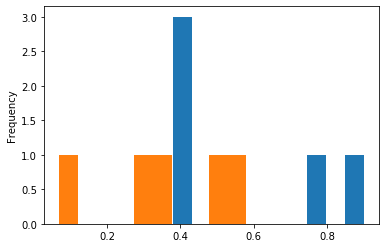

In [2]:
#plotting the data as such, columnwise, will result in a correct histogramm:
data['x'].plot.hist()
data['y'].plot.hist()

#this histogram is distorted:
#data.plot.hist()

2. We can plot a scatterplot using `plot.scatter()`, plotting two column values as pairs.

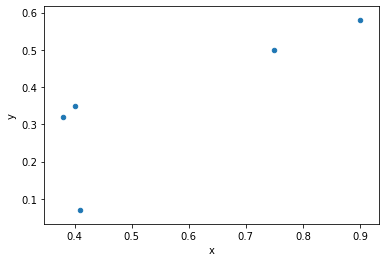

In [3]:
data.plot.scatter(x='x', y='y')

3. We can plot a bar diagram using `bar()`, plotting the two column values in bars.

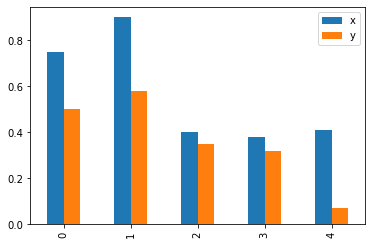

In [4]:
data.plot.bar()